X.shape (26, 2)


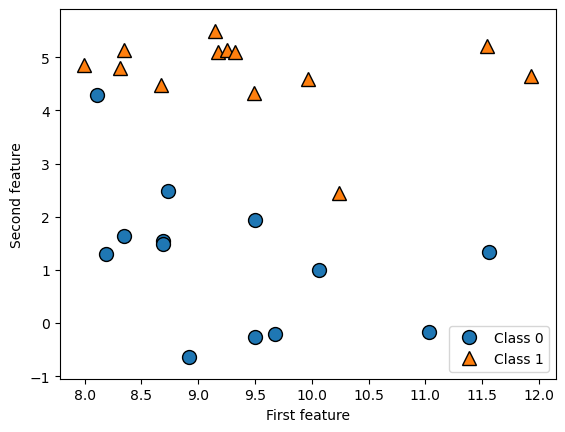

In [1]:
import mglearn
import matplotlib.pyplot as plt


# generate dataset
X, y = mglearn.datasets.make_forge()

# dataset fig
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc="best")
plt.xlabel("First feature")
plt.ylabel("Second feature")
print(f"X.shape {X.shape}")

Text(0, 0.5, 'Target')

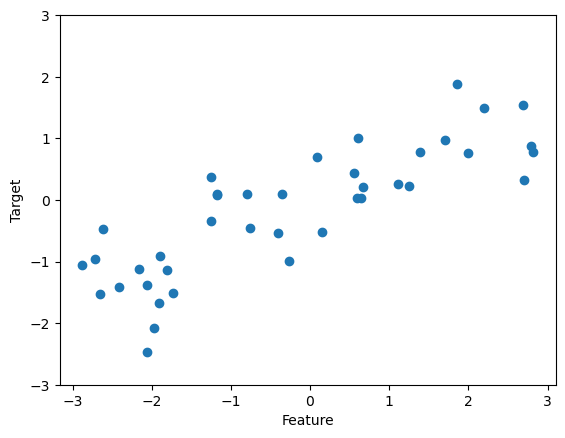

In [2]:
# 生成一个有40个样本的数据集
X,y = mglearn.datasets.make_wave(n_samples=40)

# 绘图
plt.plot(X, y, "o")
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

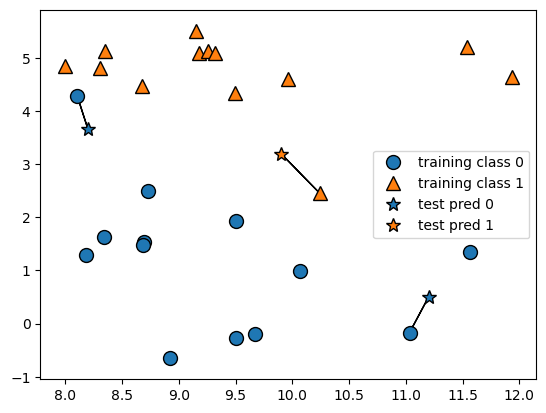

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

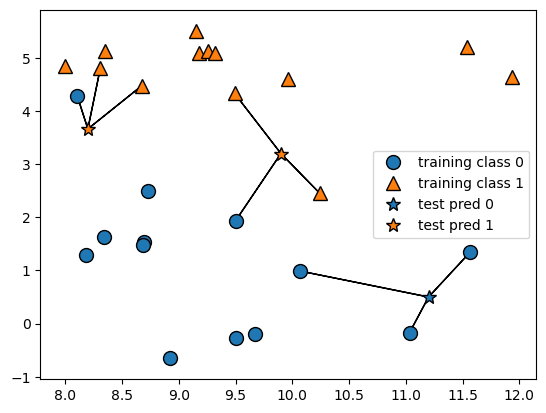

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


X, y = mglearn.datasets.make_forge()
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred)

[1 1 1 1 0 1]


In [6]:
clf.score(X_test, y_test)

0.8333333333333334

In [7]:
(y_pred == y_test).mean()

0.8333333333333334

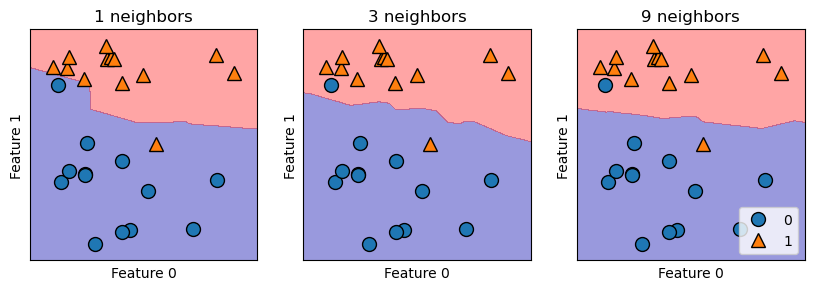

In [8]:
fig ,axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f"{n_neighbors} neighbors")
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[2].legend(loc=4)

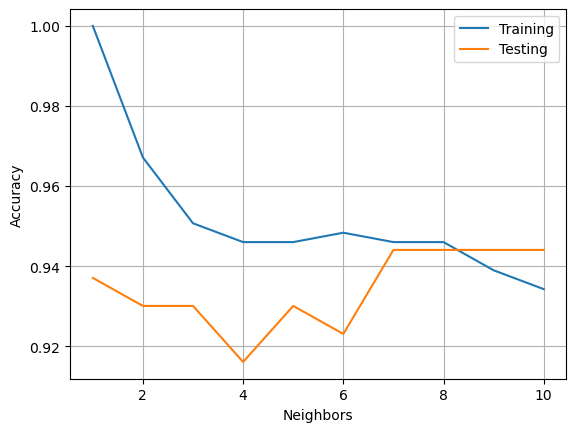

In [9]:
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)

# stratify分层抽样，分类问题中样本量比较小的时候使用，保证测试集和训练集中样本比例和原始数据相同
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

training_accuracy = []
testing_accuracy = []

# n_neighbords 从取值从1到10
neighbord_settings = range(1, 11)


for n_neighbors in neighbord_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    #记录训练精度（训练集上的精度）
    training_accuracy.append(clf.score(X_train, y_train))
    # 记录泛化精度（测试集上的精度）
    testing_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbord_settings, training_accuracy, label="Training")
plt.plot(neighbord_settings, testing_accuracy, label="Testing")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")
plt.grid()
plt.legend()



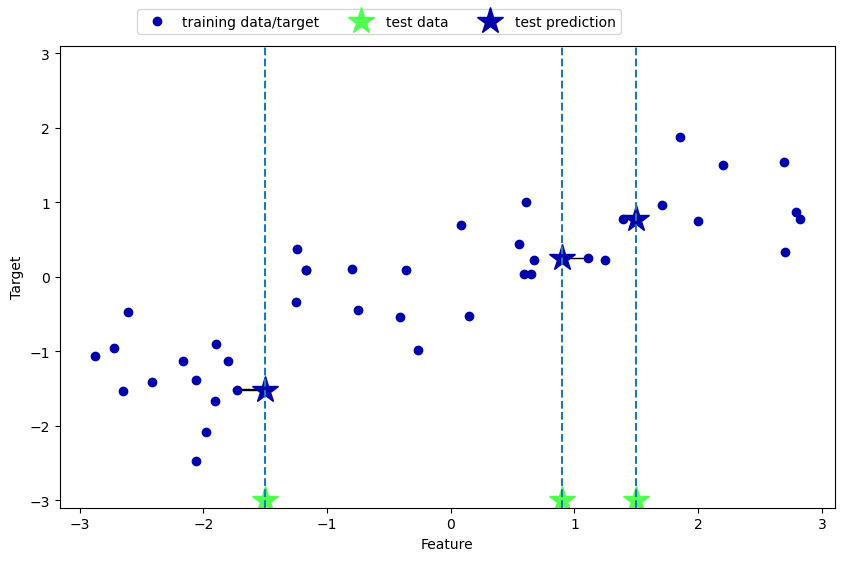

In [10]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

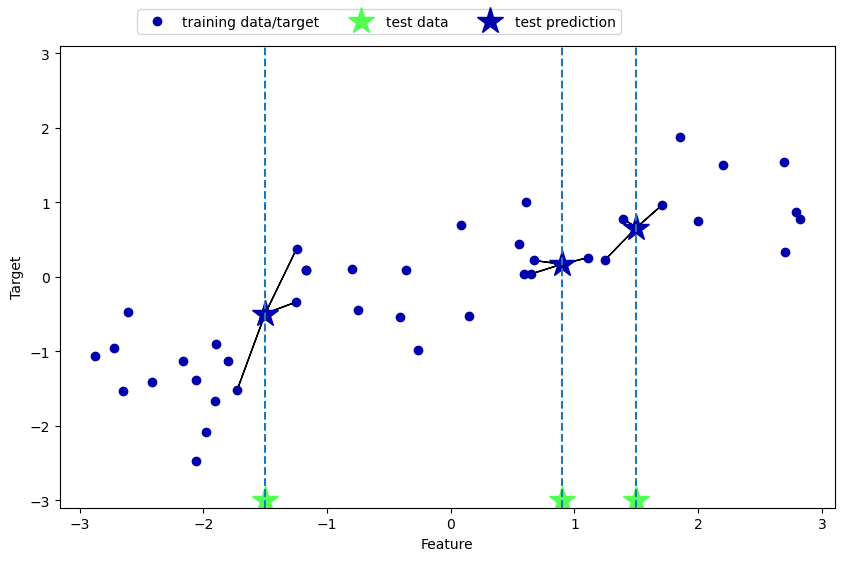

In [11]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [12]:
from sklearn.neighbors import KNeighborsRegressor


X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
print(f"Test predictions: {reg.predict(X_test)}")

Test predictions: [ 0.18836016  0.18836016 -2.07693788 -1.75751624 -1.89415682  1.44592491
 -1.04203645 -0.47317977]


In [13]:
reg.score(X_test, y_test)

0.22575136526271566

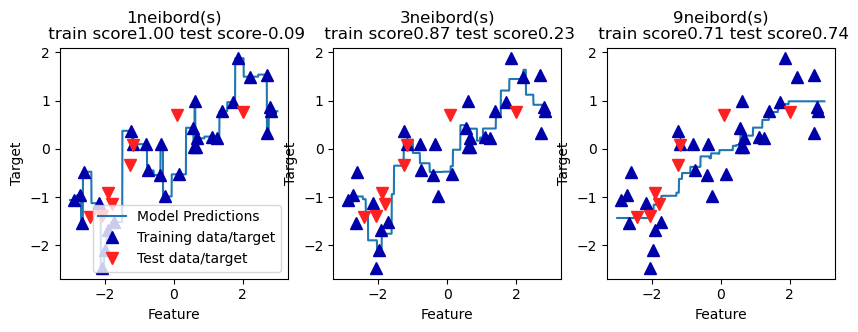

In [14]:
import numpy as np

# 创建一个fig容器 axes是一个列表，列表里包含三个图
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# 创建1000个点在-3和3之间均匀分布
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 利用1个，3个和9个邻居分别预测
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, "^", c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, "v", c=mglearn.cm2(1), markersize=8)
    ax.set_title(f"{n_neighbors}neibord(s)\n train score{reg.score(X_train, y_train):.2f} test score{reg.score(X_test, y_test):.2f}")
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model Predictions", "Training data/target", "Test data/target"], loc="best")


## 2.3.3 线性模型

w[0]: 0.393906  b: -0.031804


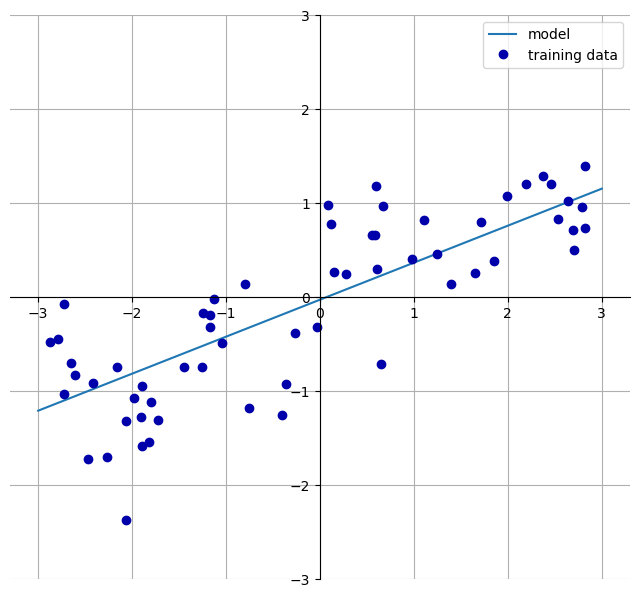

In [15]:
mglearn.plots.plot_linear_regression_wave()

In [16]:
from sklearn.linear_model import LinearRegression


X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
lr.coef_

array([0.40194711])

In [18]:
lr.intercept_

-0.014830028721128694

In [19]:
X, y =mglearn.datasets.load_extended_boston()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
lr.coef_

array([-4.68916921e+02,  1.81755400e+01, -9.82349941e+01,  1.36193364e+01,
        3.25031052e+01,  6.53975165e+01,  3.25560208e+01, -2.84628034e+01,
        9.68934569e+00,  6.48362270e+01,  1.41418899e+01,  3.57858651e+01,
        6.07807386e+00,  3.20435497e+00,  7.01047098e+02,  1.36083249e+03,
        2.29313816e+02, -8.78762975e+01,  8.75779665e+01, -1.86254119e+01,
       -7.27870330e+01,  6.40149331e+02, -1.66202225e+03,  5.45754843e+02,
       -1.48495205e+01,  1.06780706e+02, -4.39361143e+00, -1.33886010e+01,
       -4.13517309e+00, -6.64912882e+01, -1.83940066e+00,  1.20252839e+01,
       -2.32085934e+01, -3.89846515e+01,  4.45581835e+01, -2.95985368e+00,
        3.22510699e+00, -3.60031726e+01,  4.01516752e+01, -7.22997978e-01,
       -2.85144058e+00,  4.78397894e+01,  1.16095836e+01,  4.59136539e+01,
       -2.07990364e+01,  2.98497609e+00, -4.21383649e+00,  3.41186956e+01,
       -1.82464812e+01,  1.36193364e+01, -1.78208749e+01, -2.74868041e+01,
       -3.37967511e+00, -

In [22]:
lr.intercept_

-29.30286718979606

In [23]:
print(f"Train score: {lr.score(X_train, y_train):.2f}")
print(f"Test score: {lr.score(X_test, y_test):.2f}")

Train score: 0.94
Test score: 0.81


训练集score太高，而且和测试集有差异，考虑过拟合的可能性

In [24]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print(f"Training set score {ridge.score(X_train, y_train):.2f}")
print(f"Test set score {ridge.score(X_test, y_test):.2f}")

Training set score 0.87
Test set score 0.83


* 和`linearRegression`相比，`Ridge`在训练集上的分数更低，但是在测试集上的分数更高
* 意味着虽然在训练集上表现更差，但是**泛化性能**更好
* 我们只关心**泛化性能**，所以选择`Ridge`

## Lasso

In [25]:
from sklearn.linear_model import Lasso


lasso = Lasso().fit(X_train, y_train)
print(f"Training set score {lasso.score(X_train, y_train):.2f}")
print(f"Testing set score {lasso.score(X_test, y_test):.2f}")
print(f"Number of features used: {np.sum(lasso.coef_ !=0)}")

Training set score 0.25
Testing set score 0.25
Number of features used: 4


In [27]:
lasso001 = Lasso(alpha=.01, max_iter=100000).fit(X_train, y_train)
print(f"Training set score {lasso001.score(X_train, y_train):.2f}")
print(f"Testing set score {lasso001.score(X_test, y_test):.2f}")
print(f"Number of features used: {np.sum(lasso001.coef_ !=0)}")

Training set score 0.88
Testing set score 0.82
Number of features used: 30


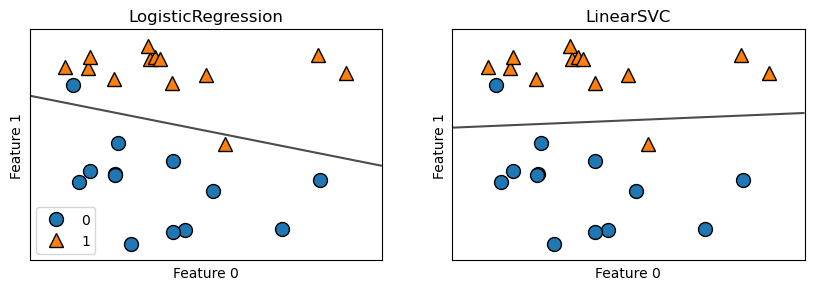

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import mglearn


# load X, y
X, y = mglearn.datasets.make_forge()

# 创建图形容器
fig ,axes = plt.subplots(1, 2, figsize=(10, 3))

# 创建循环把每一个model放到一个图形里，可视化决策边界
for model, ax in zip([LogisticRegression(), LinearSVC()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(model.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

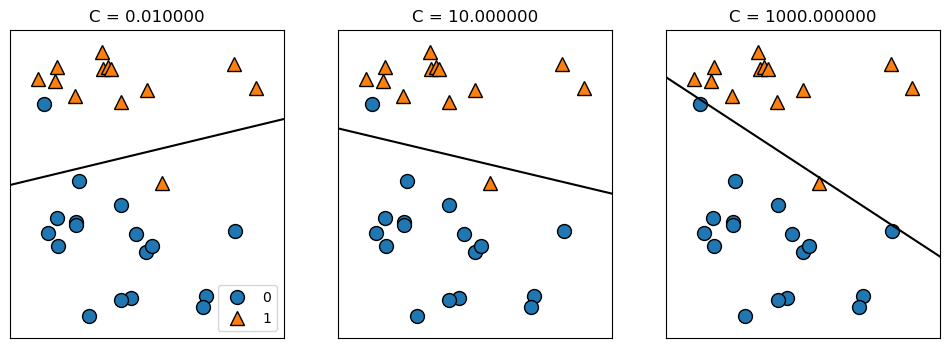

In [2]:
mglearn.plots.plot_linear_svc_regularization()

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


# 加载数据集
X,y = load_breast_cancer(return_X_y=True)

# 拆分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# 实例化模型并训练
logreg = LogisticRegression().fit(X_train, y_train)
print(f"Training set score {logreg.score(X_train, y_train):.3f}")
print(f"Test set score {logreg.score(X_test, y_test):.3f}")

Training set score 0.948
Test set score 0.951


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print(f"Training set score {logreg100.score(X_train, y_train):.3f}")
print(f"Test set score {logreg100.score(X_test, y_test):.3f}")

Training set score 0.953
Test set score 0.965


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
logreg001= LogisticRegression(C=0.01).fit(X_train, y_train)
print(f"Training set score {logreg001.score(X_train, y_train):.3f}")
print(f"Test set score {logreg001.score(X_test, y_test):.3f}")

Training set score 0.934
Test set score 0.930


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 用于多分类的线性模型